# Soccer Through the Ages

This dataset contains information on international soccer games throughout the years. It includes results of soccer games and information about the players who scored the goals. The dataset contains data from 1872 up to 2023.

The task is originally from DataCamp, I use it for training purposes. The source of data is [GitHub](https://github.com/martj42/international_results/tree/baf917b948eec00f659d2f187c33c13547f7adc4)

### 💾 The data

- `data/results.csv` - CSV with results of soccer games between 1872 and 2023
  - `home_score` - The score of the home team, excluding penalty shootouts
  - `away_score` - The score of the away team, excluding penalty shootouts
  - `tournament` - The name of the tournament
  - `city` - The name of the city where the game was played
  - `country` - The name of the country where the game was played
  - `neutral` - Whether the game was played at a neutral venue or not
- `data/shootouts.csv` - CSV with results of penalty shootouts in the soccer games
  - `winner` - The team that won the penalty shootout 
- `data/goalscorers.csv` - CSV with information on goal scorers of some of the soccer games in the results CSV
  - `team` - The team that scored the goal
  - `scorer` - The player who scored the goal
  - `minute` - The minute in the game when the goal was scored
  - `own_goal` - Whether it was an own goal or not
  - `penalty` - Whether the goal was scored as a penalty or not

The following columns can be found in all datasets:

- `date` - The date of the soccer game
- `home_team` - The team that played at home
- `away_team` - The team that played away

These shared columns fully identify the game that was played and can be used to join data between the different CSV files.

Firstly I am going to answer the questions given on DataCamp - then maybe explore the data more, although I do not find soccer as an attractive topic.

**0. Import and get the data to answer given questions.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
results = pd.read_csv("data/results.csv")
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [3]:
shootouts = pd.read_csv("data/shootouts.csv")
shootouts.head()

,date,home_team,away_team,winner
0,1967-08-22,India,Taiwan,Taiwan
1,1971-11-14,South Korea,Vietnam Republic,South Korea
2,1972-05-07,South Korea,Iraq,Iraq
3,1972-05-17,Thailand,South Korea,South Korea
4,1972-05-19,Thailand,Cambodia,Thailand


In [4]:
goalscorers = pd.read_csv("data/goalscorers.csv")
goalscorers.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


Prepare a table with winners of all games.

In [5]:
all_results = results.merge(shootouts, how='left', on=('date', 'home_team', 'away_team'))
all_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,NaN
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,NaN
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,NaN
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,NaN
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,NaN


In [6]:
all_results.loc[all_results['home_score'] > all_results['away_score'], 'winner'] = all_results.loc[all_results['home_score'] > all_results['away_score'], 'home_team']
all_results.loc[all_results['away_score'] > all_results['home_score'], 'winner'] = all_results.loc[all_results['away_score'] > all_results['home_score'], 'away_team']
all_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,NaN
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,NaN
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland


In [7]:
all_results['is_home_winner'] = all_results['home_team'] == all_results['winner']
all_results.head(20)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,is_home_winner
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,NaN,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,True
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,True
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,NaN,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,True
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,Scotland,True
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,Scotland,False
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False,Scotland,False
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False,Scotland,True
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False,Scotland,True


In [8]:
all_results['is_a_tie'] = all_results['winner'].isna()
all_results.head(20)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,is_home_winner,is_a_tie
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,NaN,False,True
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,True,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,True,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,NaN,False,True
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,True,False
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,Scotland,True,False
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,Scotland,False,False
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False,Scotland,False,False
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False,Scotland,True,False
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False,Scotland,True,False


In [9]:
null_winner = all_results[all_results['winner'].isna()]
null_winner.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,is_home_winner,is_a_tie
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,NaN,False,True
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,NaN,False,True
28,1883-03-17,Northern Ireland,Wales,1,1,Friendly,Belfast,Ireland,False,NaN,False,True
36,1885-03-14,England,Wales,1,1,British Home Championship,Blackburn,England,False,NaN,False,True
38,1885-03-21,England,Scotland,1,1,British Home Championship,London,England,False,NaN,False,True


**1. Which are the 15 countries that have won the most games since 1960? Show them in a horizontal bar plot.**

In [10]:
all_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44934 entries, 0 to 44933
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            44934 non-null  object
 1   home_team       44934 non-null  object
 2   away_team       44934 non-null  object
 3   home_score      44934 non-null  int64 
 4   away_score      44934 non-null  int64 
 5   tournament      44934 non-null  object
 6   city            44934 non-null  object
 7   country         44934 non-null  object
 8   neutral         44934 non-null  bool  
 9   winner          35118 non-null  object
 10  is_home_winner  44934 non-null  bool  
 11  is_a_tie        44934 non-null  bool  
dtypes: bool(3), int64(2), object(7)
memory usage: 3.6+ MB


In [11]:
countries_that_won_most = all_results[(all_results['date'] >= '1960-01-01') & (np.logical_not(all_results['is_a_tie']))]
countries_that_won_most.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,is_home_winner,is_a_tie
4653,1960-01-01,Morocco,Yugoslavia,0,5,Friendly,Casablanca,Morocco,False,Yugoslavia,False,False
4654,1960-01-03,Tunisia,Yugoslavia,1,5,Friendly,Tunis,Tunisia,False,Yugoslavia,False,False
4655,1960-01-06,Italy,Switzerland,3,0,Central European International Cup,Naples,Italy,False,Italy,True,False
4656,1960-01-08,Egypt,Yugoslavia,0,1,Friendly,Cairo,United Arab Republic,True,Yugoslavia,False,False
4657,1960-01-27,Guinea-Bissau,Gambia,3,2,Friendly,Bissau,Guinea-Bissau,False,Guinea-Bissau,True,False


In [12]:
top_countries = countries_that_won_most['winner'].value_counts(sort=True, ascending=False).iloc[:15]
top_countries

Brazil         553
South Korea    473
Mexico         461
Germany        451
England        402
Argentina      393
Spain          378
France         359
Italy          353
Zambia         351
Sweden         346
Russia         342
Egypt          340
Netherlands    333
Poland         328
Name: winner, dtype: int64

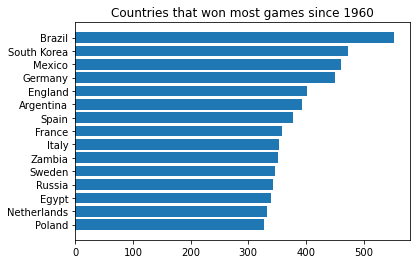

In [13]:
plt.barh(top_countries.iloc[::-1].index, top_countries.iloc[::-1])
plt.title('Countries that won most games since 1960')
plt.show()

**2. How many goals are scored in total in each minute of the game? Show this in a bar plot, with the minutes on the x-axis. If you're up for the challenge, you could even create an animated Plotly plot that shows how the distribution has changed over the years.**

In [14]:
goalscorers.sort_values(by='minute', inplace=True)

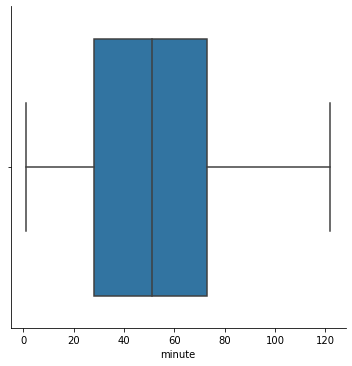

In [15]:
sns.catplot(x='minute', data=goalscorers, kind='box')
plt.show()

Add column with only year to the goalscorers table.

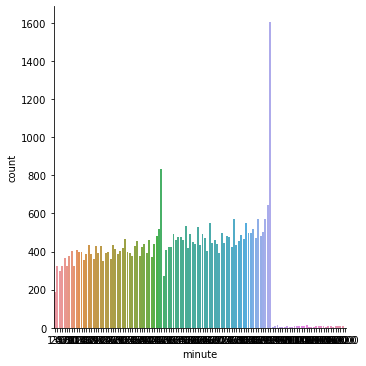

In [16]:
sns.catplot(x='minute', data=goalscorers, kind='count')
plt.show()

In [17]:
goalscorers['year'] = pd.to_datetime(goalscorers['date']).dt.year
goalscorers.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,year
25560,2006-10-11,France,Faroe Islands,France,Louis Saha,1.0,False,False,2006
2887,1959-12-06,Ecuador,Uruguay,Uruguay,Alcides Silveira,1.0,False,True,1959
17590,1998-09-28,Australia,Cook Islands,Australia,Paul Trimboli,1.0,False,False,1998
7899,1979-10-13,German DR,Switzerland,German DR,Gerd Weber,1.0,False,False,1979
14424,1995-04-25,Poland,Israel,Poland,Piotr Nowak,1.0,False,False,1995


Add column with appriopriate decade to goalscorers table.

In [18]:
year_ranges = list(range(1910, 2040, 10))
year_ranges

[1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, 2030]

In [19]:
goalscorers['decade'] = 0
for year_1, year_2 in zip(year_ranges[:-1], year_ranges[1:]):
    goalscorers.loc[(year_1 <= goalscorers['year']) & (goalscorers['year'] < year_2), 'decade'] = year_1
goalscorers.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,year,decade
25560,2006-10-11,France,Faroe Islands,France,Louis Saha,1.0,False,False,2006,2000
2887,1959-12-06,Ecuador,Uruguay,Uruguay,Alcides Silveira,1.0,False,True,1959,1950
17590,1998-09-28,Australia,Cook Islands,Australia,Paul Trimboli,1.0,False,False,1998,1990
7899,1979-10-13,German DR,Switzerland,German DR,Gerd Weber,1.0,False,False,1979,1970
14424,1995-04-25,Poland,Israel,Poland,Piotr Nowak,1.0,False,False,1995,1990


A quick preview of data:

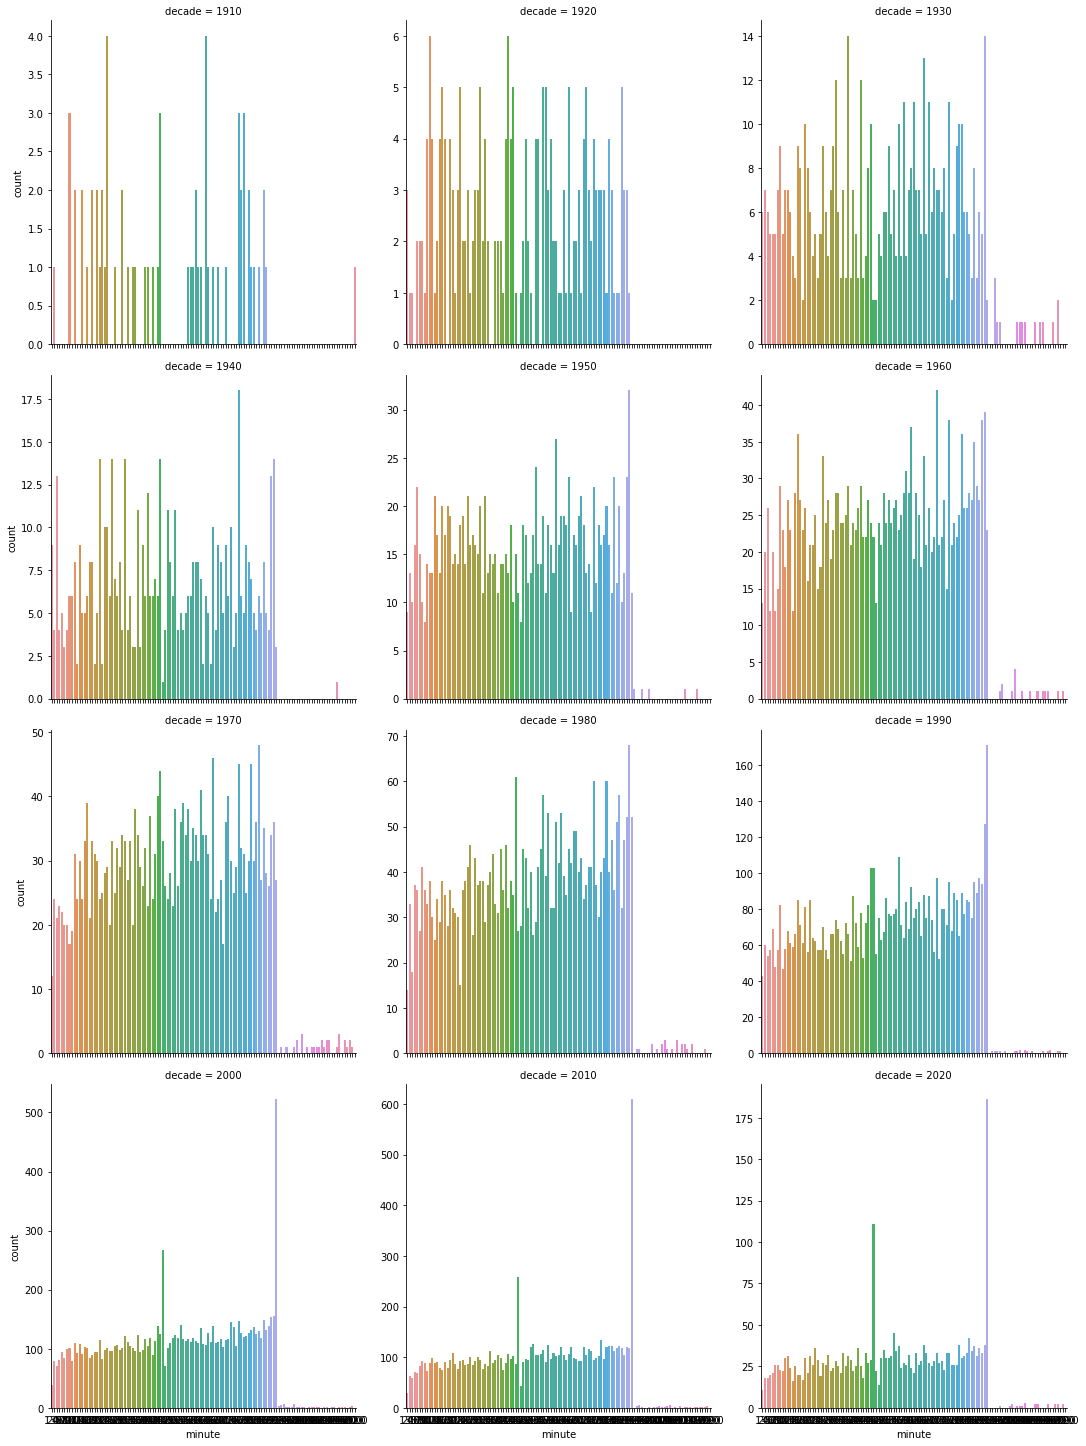

In [20]:
sns.catplot(x='minute', data=goalscorers, kind='count', col='decade', col_wrap=3, sharey=False)
plt.show()

In [21]:
max(goalscorers['minute'])

122.0

In [22]:
min(goalscorers['minute'])

1.0

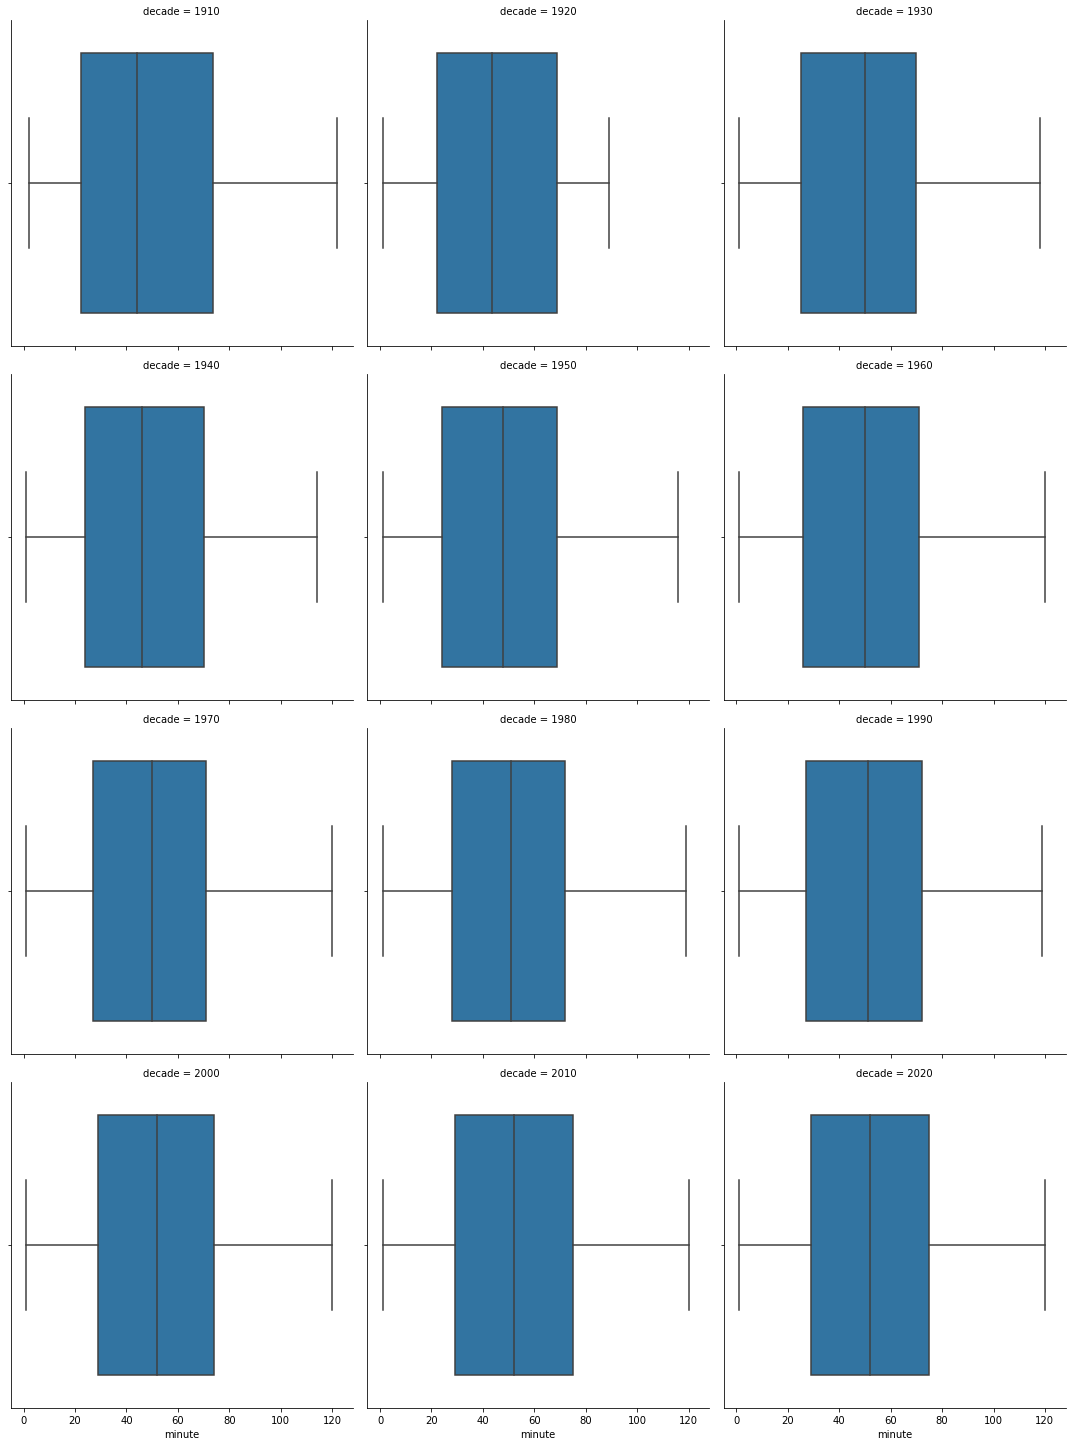

In [23]:
sns.catplot(x='minute', data=goalscorers, kind='box', col='decade', col_wrap=3)
plt.show()

Add each minute to category for 5 minutes each, then for 10 and 15 minutes categories.

Firstly, prepare the function that adds new column with appriopriate category.

In [24]:
def add_minutes_range(df: pd.DataFrame, minute_range: int) -> pd.DataFrame:
    min_range = list(range(0, 122 + minute_range, minute_range))
    column_name = 'minutes_range_' + str(minute_range)
    df[column_name] = pd.Series(dtype='str')
    for minute_1, minute_2 in zip(min_range[:-1], min_range[1:]):
        act_value = str(minute_1 + 1) + '-' + str(minute_2)
        df.loc[(goalscorers['minute'] > minute_1) & (df['minute'] <= minute_2), column_name] = act_value
    return df

First try, group the data into 5 minute categories.

In [25]:
goalscorers = add_minutes_range(goalscorers, 5)
goalscorers.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,year,decade,minutes_range_5
25560,2006-10-11,France,Faroe Islands,France,Louis Saha,1.0,False,False,2006,2000,1-5
2887,1959-12-06,Ecuador,Uruguay,Uruguay,Alcides Silveira,1.0,False,True,1959,1950,1-5
17590,1998-09-28,Australia,Cook Islands,Australia,Paul Trimboli,1.0,False,False,1998,1990,1-5
7899,1979-10-13,German DR,Switzerland,German DR,Gerd Weber,1.0,False,False,1979,1970,1-5
14424,1995-04-25,Poland,Israel,Poland,Piotr Nowak,1.0,False,False,1995,1990,1-5


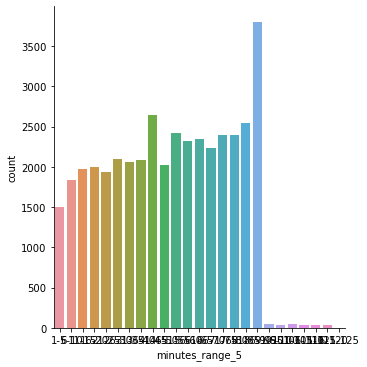

In [26]:
sns.catplot(x='minutes_range_5', data=goalscorers, kind='count')
plt.show()

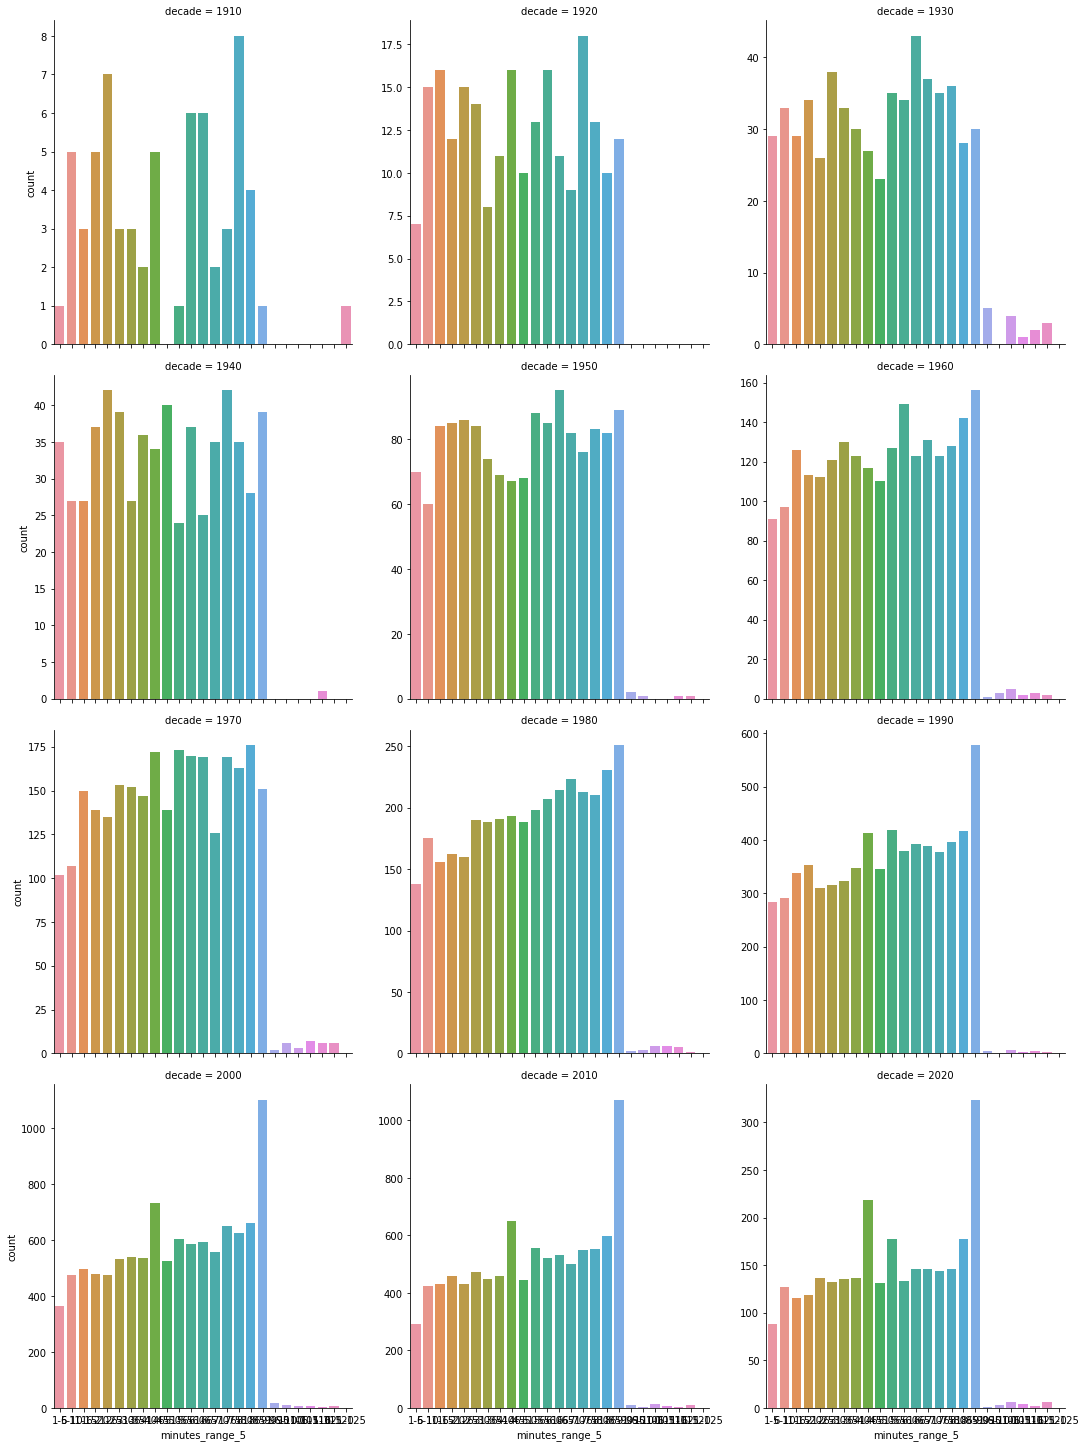

In [27]:
sns.catplot(x='minutes_range_5', data=goalscorers, kind='count', col='decade', col_wrap=3, sharey=False)
plt.show()

Second try, group the data into 10 minutes categories.

In [28]:
goalscorers = add_minutes_range(goalscorers, 10)
goalscorers.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,year,decade,minutes_range_5,minutes_range_10
25560,2006-10-11,France,Faroe Islands,France,Louis Saha,1.0,False,False,2006,2000,1-5,1-10
2887,1959-12-06,Ecuador,Uruguay,Uruguay,Alcides Silveira,1.0,False,True,1959,1950,1-5,1-10
17590,1998-09-28,Australia,Cook Islands,Australia,Paul Trimboli,1.0,False,False,1998,1990,1-5,1-10
7899,1979-10-13,German DR,Switzerland,German DR,Gerd Weber,1.0,False,False,1979,1970,1-5,1-10
14424,1995-04-25,Poland,Israel,Poland,Piotr Nowak,1.0,False,False,1995,1990,1-5,1-10


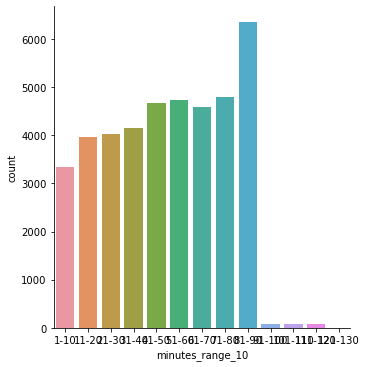

In [29]:
sns.catplot(x='minutes_range_10', data=goalscorers, kind='count')
plt.show()

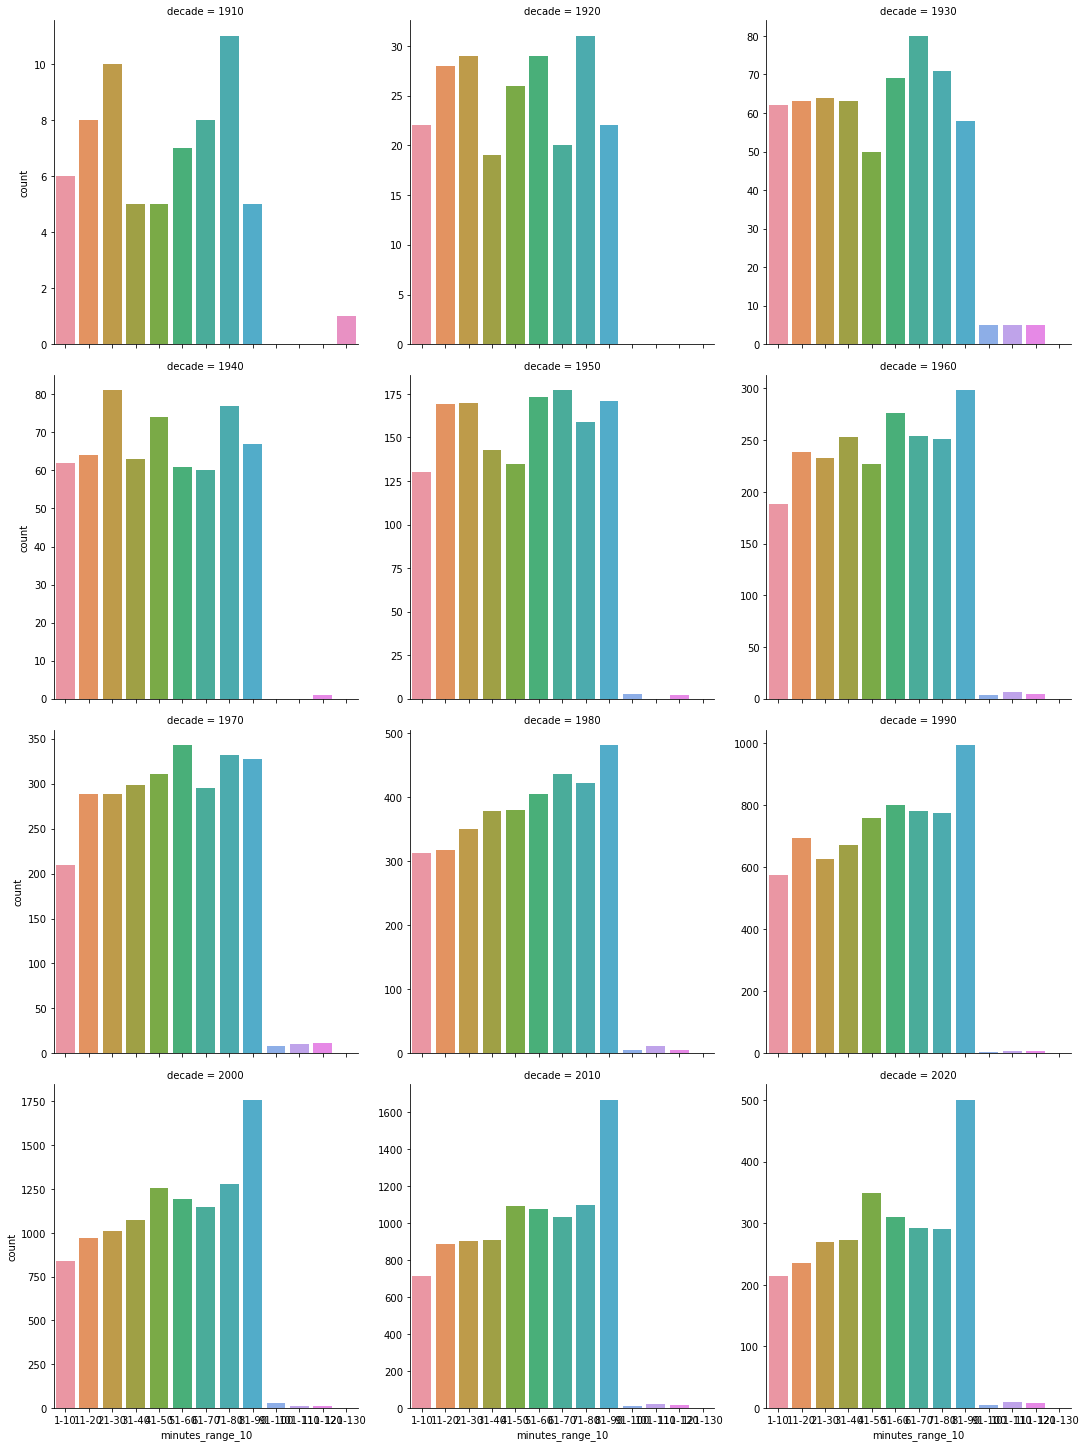

In [30]:
sns.catplot(x='minutes_range_10', data=goalscorers, kind='count', col='decade', col_wrap=3, sharey=False)
plt.show()

Third and last try, group into 15 minute long categories.

In [31]:
goalscorers = add_minutes_range(goalscorers, 15)
goalscorers.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,year,decade,minutes_range_5,minutes_range_10,minutes_range_15
25560,2006-10-11,France,Faroe Islands,France,Louis Saha,1.0,False,False,2006,2000,1-5,1-10,1-15
2887,1959-12-06,Ecuador,Uruguay,Uruguay,Alcides Silveira,1.0,False,True,1959,1950,1-5,1-10,1-15
17590,1998-09-28,Australia,Cook Islands,Australia,Paul Trimboli,1.0,False,False,1998,1990,1-5,1-10,1-15
7899,1979-10-13,German DR,Switzerland,German DR,Gerd Weber,1.0,False,False,1979,1970,1-5,1-10,1-15
14424,1995-04-25,Poland,Israel,Poland,Piotr Nowak,1.0,False,False,1995,1990,1-5,1-10,1-15


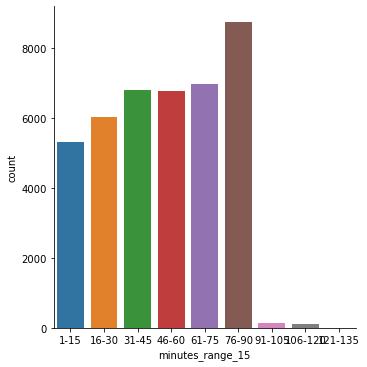

In [32]:
sns.catplot(x='minutes_range_15', data=goalscorers, kind='count')
plt.show()

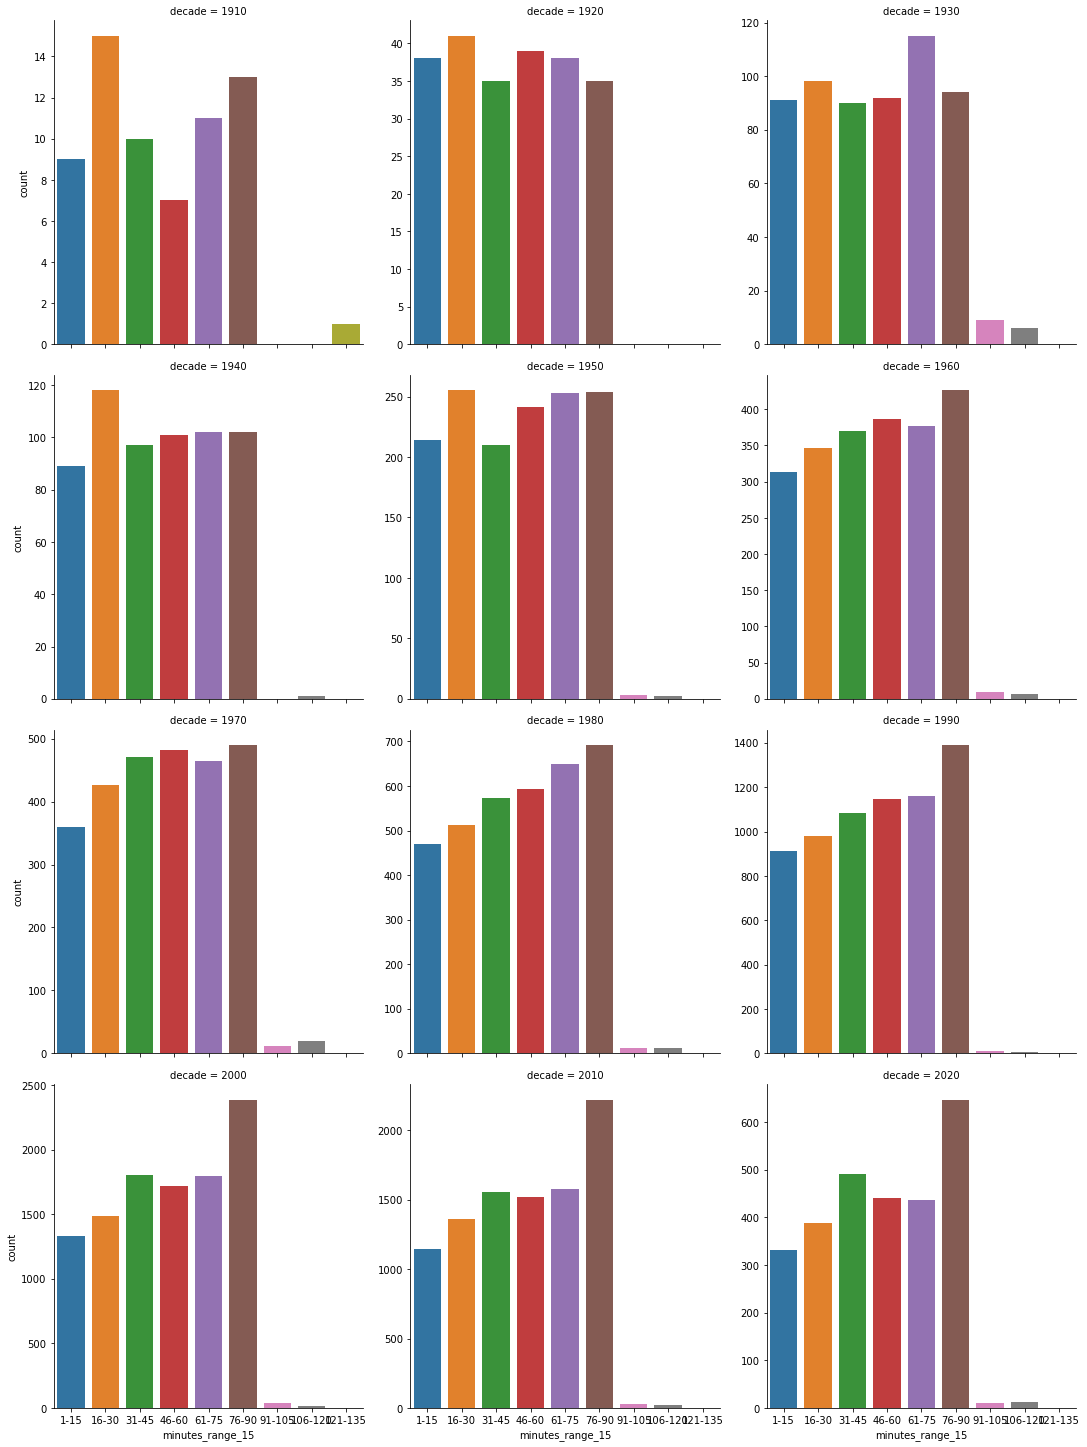

In [33]:
sns.catplot(x='minutes_range_15', data=goalscorers, kind='count', col='decade', col_wrap=3, sharey=False)
plt.show()

Jeszcze taki pomysł, żeby zrobić wykres słupkowy tylko po % z każdej kategorii.

Next idea is to convert the data about goalscorers to show the percentage of each category when the goal was shot for all matches and for each decade.

In [34]:
minutes_data = goalscorers.pivot_table(index='minute', columns='decade', values='minutes_range_5', aggfunc='count', fill_value=0)
minutes_data.head()

decade,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020
minute,,,,,,,,,,,,
1.0,0,3,6,9,9,13,12,14,43,39,30,11
2.0,1,1,7,4,13,20,24,33,60,80,63,18
3.0,0,1,6,13,10,26,21,18,54,70,59,18
4.0,0,0,5,4,16,12,23,37,57,81,70,20
5.0,0,2,5,5,22,20,22,36,69,94,69,21


In [35]:
type(minutes_data)

pandas.core.frame.DataFrame

In [36]:
minutes_data.columns

Int64Index([1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010,
            2020],
           dtype='int64', name='decade')

In [37]:
minutes_data.index

Float64Index([  1.0,   2.0,   3.0,   4.0,   5.0,   6.0,   7.0,   8.0,   9.0,
               10.0,
              ...
              112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0,
              122.0],
             dtype='float64', name='minute', length=121)

Jeszcze jeden pomysł, żeby z każdej dekady wybrać top 5(10) minutes w której strzelano najwięcej goli.

In [38]:
goalscorers.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,year,decade,minutes_range_5,minutes_range_10,minutes_range_15
25560,2006-10-11,France,Faroe Islands,France,Louis Saha,1.0,False,False,2006,2000,1-5,1-10,1-15
2887,1959-12-06,Ecuador,Uruguay,Uruguay,Alcides Silveira,1.0,False,True,1959,1950,1-5,1-10,1-15
17590,1998-09-28,Australia,Cook Islands,Australia,Paul Trimboli,1.0,False,False,1998,1990,1-5,1-10,1-15
7899,1979-10-13,German DR,Switzerland,German DR,Gerd Weber,1.0,False,False,1979,1970,1-5,1-10,1-15
14424,1995-04-25,Poland,Israel,Poland,Piotr Nowak,1.0,False,False,1995,1990,1-5,1-10,1-15


**3. Which 10 players have scored the most hat-tricks?**

Hat-trick is when a player scores 3 goals in a single match.

Pomysł nr 1: zrobić tabelę liczącą liczbę goli dla każdego z graczy, poźniej przefiltrować ją po tych co mają 3 i więcej w jednym meczu i później zrobić z tego pivot, kto miał najwięcej takich sytuacji i ile to było a potem zrobić topkę.

In [39]:
hattricks = goalscorers.pivot_table(index=['date', 'home_team', 'away_team', 'scorer'], values='minute', aggfunc='count')

In [40]:
hattricks.rename(columns={'minute': 'goals_count'}, inplace=True)
hattricks.head()

goals_count
date       home_team away_team scorer                           
1916-07-02 Chile     Uruguay   Isabelino Gradín                2
                               José Piendibene                 2
1916-07-06 Argentina Chile     Alberto Marcovecchio            2
                               Alberto Ohaco                   2
                               Juan Domingo Brown              2

In [41]:
hattricks.reset_index(inplace=True)
hattricks.head()

,date,home_team,away_team,scorer,goals_count
0,1916-07-02,Chile,Uruguay,Isabelino Gradín,2
1,1916-07-02,Chile,Uruguay,José Piendibene,2
2,1916-07-06,Argentina,Chile,Alberto Marcovecchio,2
3,1916-07-06,Argentina,Chile,Alberto Ohaco,2
4,1916-07-06,Argentina,Chile,Juan Domingo Brown,2


In [42]:
hattricks = hattricks[hattricks['goals_count'] >=3]
hattricks = hattricks[['scorer', 'goals_count']]
hattricks.head()

,scorer,goals_count
29,Arthur Friedenreich,3
45,Edwin Clarcke,3
99,Vicente Aguirre,3
111,Pedro Petrone,3
131,Manuel Seoane,3


In [43]:
most_hattricks = hattricks.pivot_table(index='scorer', values='goals_count', aggfunc='count')

In [44]:
most_hattricks.reset_index(inplace=True)
most_hattricks.rename(columns={'goals_count': 'no_of_hattricks'}, inplace=True)
most_hattricks.head()

,scorer,no_of_hattricks
0,A'ala Hubail,1
1,Abdoulaye Traoré,1
2,Abdul-Hamid Bassiouny,1
3,Abel Hernández,1
4,Ad-Diba,1


In [45]:
most_hattricks.sort_values(by=['no_of_hattricks', 'scorer'], ascending=[False, True], inplace=True)
most_hattricks.head(25)

,scorer,no_of_hattricks
128,Cristiano Ronaldo,9
594,Robert Lewandowski,6
131,Damian Mori,5
267,Harry Kane,5
691,Vaughan Coveny,5
241,Gerd Müller,4
375,Just Fontaine,4
711,Yang Xu,4
7,Ademir de Menezes,3
36,Ali Daei,3


Pomyśleć nad jakąś wizualizacją tego. Na przykład wykres ile ogółem hat-tricków, ile osób miało 1, ile osób miało ... itd. może jakiś kołowy? 

**4. What is the proportion of games won by each team at home and away? What is the difference between the proportions?**

In [46]:
all_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,is_home_winner,is_a_tie
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,NaN,False,True
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,True,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,True,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,NaN,False,True
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,True,False


Prepare home_results.

In [47]:
home_results = all_results.pivot_table(index='home_team', values='is_home_winner', aggfunc=['sum', 'count'])
home_results.reset_index(inplace=True)
home_results.columns = home_results.columns.droplevel(1)
home_results.head()

,home_team,sum,count
0,Abkhazia,11,18
1,Afghanistan,17,42
2,Albania,71,193
3,Alderney,0,7
4,Algeria,179,313


Add a column to all_results called is_away_winner.

In [48]:
all_results['is_away_winner'] = all_results['winner'] == all_results['away_team']
all_results.head(20)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,is_home_winner,is_a_tie,is_away_winner
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,NaN,False,True,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,True,False,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,True,False,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,NaN,False,True,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,True,False,False
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,Scotland,True,False,False
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,Scotland,False,False,True
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False,Scotland,False,False,True
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False,Scotland,True,False,False
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False,Scotland,True,False,False


Prepare away_results.

In [49]:
away_results = all_results.pivot_table(index='away_team', values='is_away_winner', aggfunc=['sum', 'count'])
away_results.reset_index(inplace=True)
away_results.columns = away_results.columns.droplevel(1)
away_results.head()

,away_team,sum,count
0,Abkhazia,3,10
1,Afghanistan,15,83
2,Albania,27,174
3,Alderney,3,12
4,Algeria,70,241


Merge two tables together.

In [50]:
print(home_results.shape, away_results.shape)

(312, 3) (307, 3)


In [51]:
home_and_away_table = home_results.merge(away_results, how='outer', left_on='home_team', right_on='away_team', suffixes=['_home', '_away'])
home_and_away_table.head()

,home_team,sum_home,count_home,away_team,sum_away,count_away
0,Abkhazia,11.0,18.0,Abkhazia,3.0,10.0
1,Afghanistan,17.0,42.0,Afghanistan,15.0,83.0
2,Albania,71.0,193.0,Albania,27.0,174.0
3,Alderney,0.0,7.0,Alderney,3.0,12.0
4,Algeria,179.0,313.0,Algeria,70.0,241.0


In [52]:
home_and_away_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 316
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   home_team   312 non-null    object 
 1   sum_home    312 non-null    float64
 2   count_home  312 non-null    float64
 3   away_team   307 non-null    object 
 4   sum_away    307 non-null    float64
 5   count_away  307 non-null    float64
dtypes: float64(4), object(2)
memory usage: 17.3+ KB


In [53]:
home_and_away_table.drop(columns='away_team', inplace=True)
home_and_away_table.rename(columns={'home_team': 'team'}, inplace=True)
home_and_away_table.head()

,team,sum_home,count_home,sum_away,count_away
0,Abkhazia,11.0,18.0,3.0,10.0
1,Afghanistan,17.0,42.0,15.0,83.0
2,Albania,71.0,193.0,27.0,174.0
3,Alderney,0.0,7.0,3.0,12.0
4,Algeria,179.0,313.0,70.0,241.0


In [54]:
home_and_away_table.dropna(inplace=True)
home_and_away_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 311
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   team        302 non-null    object 
 1   sum_home    302 non-null    float64
 2   count_home  302 non-null    float64
 3   sum_away    302 non-null    float64
 4   count_away  302 non-null    float64
dtypes: float64(4), object(1)
memory usage: 14.2+ KB


In [55]:
home_and_away_table.head()

,team,sum_home,count_home,sum_away,count_away
0,Abkhazia,11.0,18.0,3.0,10.0
1,Afghanistan,17.0,42.0,15.0,83.0
2,Albania,71.0,193.0,27.0,174.0
3,Alderney,0.0,7.0,3.0,12.0
4,Algeria,179.0,313.0,70.0,241.0


In [62]:
home_and_away_table['home_result'] = home_and_away_table['sum_home'] / home_and_away_table['count_home'] * 100
home_and_away_table['away_result'] = home_and_away_table['sum_away'] / home_and_away_table['count_away'] * 100
home_and_away_table.head()

,team,sum_home,count_home,sum_away,count_away,home_result,away_result
0,Abkhazia,11.0,18.0,3.0,10.0,61.111111,30.000000
1,Afghanistan,17.0,42.0,15.0,83.0,40.476190,18.072289
2,Albania,71.0,193.0,27.0,174.0,36.787565,15.517241
3,Alderney,0.0,7.0,3.0,12.0,0.000000,25.000000
4,Algeria,179.0,313.0,70.0,241.0,57.188498,29.045643


In [63]:
home_and_away_table.describe()

,sum_home,count_home,sum_away,count_away,home_result,away_result
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,73.360927,148.692053,42.870861,148.738411,44.334553,26.165551
std,83.256152,143.425955,51.218312,134.523477,18.945322,16.573844
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,7.250000,22.000000,4.000000,25.000000,33.333333,16.012346
50%,39.500000,111.500000,22.000000,120.500000,45.125288,25.000000
75%,113.750000,250.250000,65.750000,241.000000,56.772993,34.185759
max,435.000000,598.000000,276.000000,563.000000,100.000000,100.000000


Count general difference between matches won at home and away.

In [58]:
general_home_win_score = round(sum(home_and_away_table['sum_home']) / sum(home_and_away_table['count_home']) * 100, 2)
general_home_win_score

49.34

In [59]:
general_away_win_score = round(sum(home_and_away_table['sum_away']) / sum(home_and_away_table['count_away']) * 100, 2)
general_away_win_score

28.82

In [60]:
home_and_away_table_without_outliers = home_and_away_table[(home_and_away_table['sum_home'] > 20) & \
                                                           (home_and_away_table['sum_away'] > 20)]
home_and_away_table_without_outliers.shape

(157, 7)

In [64]:
home_and_away_table_without_outliers.describe()

,sum_home,count_home,sum_away,count_away,home_result,away_result
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,129.585987,250.834395,76.904459,248.394904,49.484703,29.367588
std,81.044942,125.654178,51.009399,110.560040,9.879960,8.641259
min,21.000000,49.000000,21.000000,78.000000,21.848739,8.536585
25%,65.000000,141.000000,38.000000,153.000000,42.666667,22.522523
50%,109.000000,235.000000,64.000000,240.000000,49.411765,28.448276
75%,184.000000,327.000000,97.000000,310.000000,57.275542,34.782609
max,435.000000,598.000000,276.000000,563.000000,72.742475,54.186047


In [65]:
general_home_win_score_without_outliers =  round(sum(home_and_away_table_without_outliers['sum_home']) \
                                                 / sum(home_and_away_table_without_outliers['count_home']) * 100, 2)
general_home_win_score_without_outliers

51.66

In [61]:
general_away_win_score_without_outliers =  round(sum(home_and_away_table_without_outliers['sum_away']) \
                                                 / sum(home_and_away_table_without_outliers['count_away']) * 100, 2)
general_away_win_score_without_outliers

30.96

Pomysł, żeby do tego pokazać jakieś boxploty z zaznaczeniem uśrednionego + może kilka oddzielnych wykresów? Jak to wygląda na przykład dla krajów, które 

**5. How many games have been won by the home team? And by the away team?**